**Submitted by Tarang Ranpara (202011057)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [2]:
def divide_data(data,ratio):
    #ratio accepts 0.90, 0.80 etc    
    n = data.shape[0]
    train_data,test_data =  data.loc[0:int(ratio*n)-1],data.loc[int(ratio*n):n-1]
    
    x_train,y_train = train_data.iloc[:,1:-1],train_data.iloc[:,-1]
    x_test,y_test = test_data.iloc[:,1:-1],test_data.iloc[:,-1]
    
    return np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)

In [3]:
def euclidian_distance(inst1,inst2,length):
    dist=0
    for i in range(length):
        dist += (inst1[i]-inst2[i])**2
    
    return dist**(1/2)

In [4]:
def get_neighbors(x_train,y_train,test_instance,k):
    distances = []
    neighbors = []
    n = x_train.shape[0]
    
    for i in range(n):
        distances.append((x_train[i],y_train[i],euclidian_distance(x_train[i],test_instance,4)))
    
    distances.sort(key = operator.itemgetter(2))
    
    # getting top K results
    for i in range(k):
        neighbors.append(distances[i])
        
    return neighbors

In [5]:
def get_result(neighbors):
    counts = dict()
    for neighbor in neighbors:
        if neighbor[1] not in counts:
            counts[neighbor[1]] = 1
        else:
            counts[neighbor[1]] += 1
    
    # all possibilities
    print('possibilities:',counts)
    
    # taking votes of all neighbours
    maximum = max(counts, key=counts.get)
    
    print('predicted:', maximum)
    return maximum

In [8]:
if __name__ == '__main__':
    lst = dict()
    data = pd.read_csv('https://raw.githubusercontent.com/TarangRanpara/Machine-learning-algos/master/Iris-data-KNN/Iris.csv')
    x_train,y_train,x_test,y_test = divide_data(data,0.90)
    
    # for different K values 
    for k in [1, 3,5,7,9]:
        print(f'K: {k}')
        print('*'*50)
        acc = 0
        for test_instance,y_original in zip(x_test,y_test): 
            neighbors = get_neighbors(x_train,y_train,test_instance,k)
            predicted = get_result(neighbors)
            print('original:',y_original)
            if y_original == predicted:
                acc += 1
            print('.'*40)
            print()
        
        # accuracy calculated for each K
        accval = acc/len(y_test) * 100
        print(f'Accuracy: {accval}%')
        lst[k] = accval
        

K: 1
**************************************************
possibilities: {'Iris-virginica': 1}
predicted: Iris-virginica
original: Iris-virginica
........................................

possibilities: {'Iris-virginica': 1}
predicted: Iris-virginica
original: Iris-virginica
........................................

possibilities: {'Iris-virginica': 1}
predicted: Iris-virginica
original: Iris-virginica
........................................

possibilities: {'Iris-virginica': 1}
predicted: Iris-virginica
original: Iris-virginica
........................................

possibilities: {'Iris-virginica': 1}
predicted: Iris-virginica
original: Iris-virginica
........................................

possibilities: {'Iris-virginica': 1}
predicted: Iris-virginica
original: Iris-virginica
........................................

possibilities: {'Iris-virginica': 1}
predicted: Iris-virginica
original: Iris-virginica
........................................

possibilities: {'Iris-virginica': 

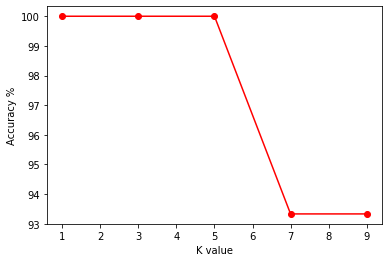

In [9]:
plt.plot(list(lst.keys()), list(lst.values()), 'ro-')
plt.xlabel('K value')
plt.ylabel('Accuracy %')
plt.show()